In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

In [40]:
train = pd.read_csv("/Users/houxiaohui/Desktop/Digit_Recognizer/train.csv")
test = pd.read_csv("/Users/houxiaohui/Desktop/Digit_Recognizer/test.csv")

In [3]:
from sklearn.manifold import TSNE

In [41]:
x = train.drop(['label'],axis=1)
y = train.label

通过plt.imshow展示拼接出来的图片

8


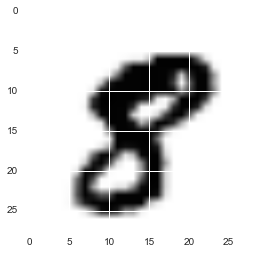

In [5]:
plt.imshow(x.loc[10].reshape(28,28))
print y.loc[10]

In [6]:
from sklearn.decomposition import PCA, RandomizedPCA

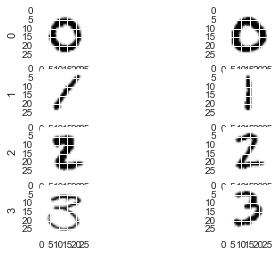

In [7]:
classes = [0,1,2,3]
plt.figure()
draw = []
for cls in classes:
    count = 1
    for i in range(len(y)):
        if y[i] == cls:
            #print "found", cls
            draw.append(x.loc[i])
            count +=1
            if count >2:
                break
                
for num, pixel in enumerate(draw):
    plt.subplot(len(classes),2,num+1)
    plt.imshow(pixel.reshape(28,28))
    if not num%2:
        plt.ylabel(num/2)

即使通过PCA降维，也很难满足可视化要求，可以通过manifold变为二维，从而可视化,但需要的时间太长了所以中断了

In [19]:
tsne = TSNE()
tsne.fit(x_pca)

KeyboardInterrupt: 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
def algorithm(method):
    method.fit(X_train,y_train)
    y_pred = method.predict(X_test)
    print "全变量", method, accuracy_score(y_test, y_pred)

1.KNN
2.SVM
3.随机森林
4.根据kaggle的讨论区，用神经网络CNN能达到99%以上的正确率，但这个算法暂时不会

In [10]:
algorithm(KNeighborsClassifier())
algorithm(RandomForestClassifier())
algorithm(SVC())

KeyboardInterrupt: 

KNN算法最好

In [43]:
print "使用PCA降维，然后喂给KNN算法"
pca = PCA(n_components = 30)
x_pca = pca.fit_transform(X_train)
knn = KNeighborsClassifier()
knn.fit(x_pca,y_train)
y_pred = knn.predict(pca.transform(X_test))
print "PCA&KNN的准确率", accuracy_score(y_test, y_pred)

使用PCA降维，然后喂给KNN算法
PCA&KNN的准确率 0.971666666667


通过调参提高准确率

In [12]:
from sklearn.grid_search import GridSearchCV  

In [13]:
#"GridSearchCV 调参,使用PCA降维"
parameters = {'n_neighbors':np.linspace(4,10,7), 'weights':('uniform','distance')}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv=5)
pca = PCA(n_components = 30)
x_pca = pca.fit_transform(x)
clf.fit(x_pca,y)
knn = clf.best_estimator_

/Users/houxiaohui/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]


In [14]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4.0, p=2,
           weights='distance')

找到最佳参数knn，用knn训练全部训练集

In [44]:
knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4.0, p=2,
           weights='distance')
knn.fit(pca.fit_transform(x),y)
test_pred = knn.predict(pca.transform(test))

In [45]:
submission = pd.DataFrame({"ImageID":np.arange(1,len(test_pred)+1),\
                          "Label":test_pred})

In [46]:
submission.to_csv("submission.csv",index=False)